# Exploratory Data Analysis on Loan Dataset
### Problem statement:
The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. So applying EDA and risk analytics to help identify applicants with loss potential regarding repayment of credit amount in order to minimise the risk of losing money while lending to customers. 
#### Data source: 
This casestudy involves two data set one is about whether a client has payment difficulties and other contains data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

### Importing Libraries

In [175]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [176]:
# import warnings
import warnings
warnings.filterwarnings('ignore')

### Data Reading Process
#### Read Dataset & data type of variables

In [177]:
# mount google drive to collaboratory
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
# import selected copy path and read csv file
path = "/content/drive/MyDrive/colab data/Copy of application_data.csv"
df = pd.read_csv(path)

In [179]:
# read first five rows
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [180]:
# print a concise summery of dataframe
df.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [181]:
# print last five rows
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0,0,0,0,0,...,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,0.025164,-20775,365243,-4388.0,-4090,NaN,1,0,0,1,1,0,NaN,1.0,2,2,MONDAY,8,0,0,0,0,0,0,...,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,585000.0,Unaccompanied,Working,Higher education,Separated,House / apartment,0.005002,-14966,-7921,-6737.0,-5150,NaN,1,1,0,1,0,1,Managers,1.0,3,3,THURSDAY,9,0,0,0,0,1,1,...,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,319500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,0.005313,-11961,-4786,-2562.0,-931,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,9,0,0,0,1,1,0,...,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.046220,-16856,-1262,-5128.0,-410,NaN,1,1,1,1,1,0,Laborers,2.0,1,1,THURSDAY,20,0,0,0,0,1,1,...,NaN,0.0805,NaN,0.0000,NaN,block of flats,0.0718,Panel,No,0.0,0.0,0.0,0.0,-787.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


### Ist Inference:
After reading the dataframe, we identified shape of first dataframe (df), which consists information of applicants at the time of application, that has 3,7510 entries over 122 columns and categorical and numerical data type variables available in data set.

### Fixing Rows and Columns
#### Delete unnecessary columns

In [182]:
# drop the columns which is of no use
df.drop(['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'],axis =1,inplace= True)

In [183]:
# check the shape of dataframe
df.shape

(307511, 119)

### IInd Inference:
After conducting a checklist for fixing rows and columns, dropped EXT_SCOURCE_1,EXT_SCOURCE_2 and EXT_SCOURCE_3 columns as they are unnecessary columns for further analysis.

### Data Cleaning Process
#### check columns with null values

In [184]:
# identify columns with more than 40 percent missing values
[features for features in df.columns if df[features].isnull().mean() > 0.40]

['OWN_CAR_AGE',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MODE',
 'WALLSMATERI

In [185]:
# create a variable for columns having missing values more than 40 percent
df_40 = [features for features in df.columns if df[features].isnull().mean() > 0.40]

In [186]:
# count the length of missing values columns
len(df_40)

48

#### Drop columns with missing values greater than 40 percent

In [187]:
# drop all columns with more than 40 percent missing values
df.drop(columns = df_40, inplace= True)

In [188]:
# check the shape of dataframe
df.shape

(307511, 71)

In [189]:
# check for less missing values in columns
[features for features in df.columns if df[features].isnull().mean() > 0]

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [190]:
# assign a variable to columns having missing values 
df_0 =[features for features in df.columns if df[features].isnull().mean() > 0]

In [191]:
# check percentage of missing values in the columns
df[['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().sum()

AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NAME_TYPE_SUITE                1292
OCCUPATION_TYPE               96391
CNT_FAM_MEMBERS                   2
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
DEF_60_CNT_SOCIAL_CIRCLE       1021
DAYS_LAST_PHONE_CHANGE            1
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
dtype: int64

#### Removing rows with insignificant values MCAR

In [192]:
# drop the records with AMT_ANNUITY missing in df and store in dataframe
df = df[~df.AMT_ANNUITY.isnull()]

In [193]:
df.AMT_ANNUITY.isnull().sum()

0

In [194]:
# drop the records with CNT_FAM_MEMBERS missing in df and store in dataframe
df = df[~df.CNT_FAM_MEMBERS.isnull()]

In [195]:
df.CNT_FAM_MEMBERS.isnull().sum()

0

In [196]:
# drop the records with DAYS_LAST_PHONE_CHANGE missing in df and store in dataframe
df = df[~df.DAYS_LAST_PHONE_CHANGE.isnull()]

In [197]:
df.DAYS_LAST_PHONE_CHANGE.isnull().sum()

0

In [198]:
# checck the shape of dataframe
df.shape

(307496, 71)

In [199]:
# check columns with missing values in AMT_GOODS_PRICE   
df[(df['AMT_GOODS_PRICE'].isnull() & (df['NAME_CONTRACT_TYPE']=='Revolving loans'))]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,-1834,1,1,1,1,0,0,Core staff,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,2.0,1.0,2.0,1.0,-2011.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.010006,-11993,-2921,-1289.0,-1948,1,1,1,1,1,1,Private service staff,2.0,2,2,SATURDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-476.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,NaN,NaN,Working,Higher education,Married,House / apartment,0.008474,-9727,-2712,-4132.0,-800,1,1,1,1,1,0,Accountants,2.0,2,2,WEDNESDAY,18,0,0,0,0,0,0,Trade: type 7,1.0,1.0,1.0,0.0,-643.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.011657,-11079,-899,-3765.0,-572,1,1,1,1,1,0,Managers,3.0,1,1,WEDNESDAY,11,0,0,0,0,0,0,Government,1.0,0.0,1.0,0.0,-1292.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,NaN,Working,Higher education,Single / not married,House / apartment,0.032561,-9986,-1847,-4762.0,-506,1,1,1,1,1,0,Security staff,1.0,1,1,SATURDAY,18,0,0,0,0,0,0,Construction,1.0,0.0,1.0,0.0,-159.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,NaN,NaN,Working,Higher education,Married,House / apartment,0.025164,-11313,-1470,-1188.0,-3523,1,1,1,1,0,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,1,0,1,Business Entity Type 3,3.0,1.0,3.0,0.0,-777.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,NaN,NaN,Working,Secondary / secondary special,Married,House / apartment,0.028663,-16870,-825,-1303.0,-427,1,1,1,1,1,0,Drivers,3.0,2,2,THURSDAY,10,0,0,0,1,1,1,Self-employed,3.0,1.0,3.0,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,NaN,NaN,Working,Inc

##### observation:
Values in AMT_GOODS_PRICE is missing at random(MAR) as it is usual to not  have amount of goods price in revolving loan because it allows money to be tansferred into customer's bank account for any reason and that is why NAME_TYPE_SUIT is also missing.

#### Imputing missing values

In [200]:
# Check the median value in the AMT_GOODS_PPRICE column
df['AMT_GOODS_PRICE'].median()

450000.0

In [201]:
# Fill up the nulls in the 'AMT_GOODS_PRICE column with median value
df.AMT_GOODS_PRICE = df.AMT_GOODS_PRICE.fillna(df.AMT_GOODS_PRICE.median())

In [202]:
df.AMT_GOODS_PRICE.value_counts()

450000.0     26295
225000.0     25281
675000.0     24962
900000.0     15416
270000.0     11428
             ...  
1265751.0        1
503266.5         1
810778.5         1
666090.0         1
743863.5         1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [203]:
df.AMT_GOODS_PRICE.isnull().sum()

0

In [204]:
# check the rows with missimng values in NAME_TYPE_SUITE whether mcar or mar or mnar
df[df.NAME_TYPE_SUITE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866,-2546,-5448.0,-4097,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,12,0,0,0,0,0,0,Transport: type 3,0.0,0.0,0.0,0.0,-3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,450000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,-1834,1,1,1,1,0,0,Core staff,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,2.0,1.0,2.0,1.0,-2011.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1199,101414,0,Cash loans,M,Y,N,0,135000.0,533668.5,34636.5,477000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-21717,-2393,-5486.0,-4513,1,1,0,1,0,0,NaN,2.0,1,1,SUNDAY,10,0,0,0,0,0,0,Transport: type 3,3.0,0.0,3.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
1669,101954,0,Cash loans,F,Y,N,2,153000.0,1162170.0,30654.0,832500.0,NaN,State servant,Higher education,Separated,House / apartment,0.024610,-12975,-1839,-3896.0,-2179,1,1,0,1,1,0,Core staff,3.0,2,2,THURSDAY,12,0,0,0,0,0,0,Government,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1862,102183,0,Cash loans,F,Y,N,0,121500.0,268659.0,13774.5,243000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.010147,-12870,-2822,-777.0,-4371,1,1,1,1,1,0,NaN,2.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,2.0,0.0,2.0,0.0,-326.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306273,454852,0,Revolving loans,M,N,Y,2,67500.0,202500.0,10125.0,450000.0,NaN,Working,Higher education,Married,House / apartment,0.020713,-14079,-1648,-2492.0,-4905,1,1,1,1,1,0,Laborers,4.0,3,3,THURSDAY,6,0,0,0,0,0,0,Self-employed,0.0,0.0,0.0,0.0,-1154.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
306544,455158,0,Cash loans,F,N,N,0,180000.0,894825.0,23602.5,894825.0,NaN,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.026392,-19625,-1634,-12077.0,-721,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,18,0,0,0,0,0,0,Business Entity Type 3,4.0,0.0,4.0,0.0,-363.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
306615,455245,0,Cash loans,M,N,N,0,180000.0,2

##### Observation:
It is usual to not have name type suite while applying for loan, hence imputing missing values with mode value of the column.

In [205]:
# # Check the mode value in the NAME_TYPE_SUITE column
df['NAME_TYPE_SUITE'].mode()[0]

'Unaccompanied'

In [206]:
# Fill up the nulls in the NAME_TYPE_SUITE column with mode value
df.NAME_TYPE_SUITE = df.NAME_TYPE_SUITE.fillna(df.NAME_TYPE_SUITE.mode()[0])

In [207]:
df.NAME_TYPE_SUITE.isnull().sum()

0

In [208]:
# check value counts in occupation column
df.OCCUPATION_TYPE.value_counts()

Laborers                 55184
Sales staff              32101
Core staff               27569
Managers                 21369
Drivers                  18602
High skill tech staff    11379
Accountants               9811
Medicine staff            8536
Security staff            6720
Cooking staff             5945
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1304
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [209]:
# check the rows with missimng values in OCCUPATION_TYPE whether mcar or mar or mnar
df[df.OCCUPATION_TYPE.isnull()]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046220,-9994,-1796,-4668.0,-2661,1,1,0,1,0,1,NaN,1.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Military,0.0,0.0,0.0,0.0,-849.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,270000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.072508,-16010,-1185,-5034.0,-4392,1,1,0,1,1,0,NaN,3.0,1,1,SATURDAY,17,0,0,0,0,0,0,Business Entity Type 2,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,-23125,365243,-5485.0,-4115,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-846.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,8.0
307500,456244,0,Cash loans,F,N,Y,0,261000.000,1303812.0,35982.0,1

In [210]:
# Count values of education column
df.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    218386
Higher education                  74857
Incomplete higher                 10275
Lower secondary                    3814
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [211]:
# check the rows with missimng values in OCCUPATION_TYPE whether MAR
df[(df.OCCUPATION_TYPE.isnull()) & (df['NAME_EDUCATION_TYPE']=='Secondary / secondary special')]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
38,100045,0,Cash loans,F,N,Y,0,99000.000,247275.0,17338.5,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006207,-23920,365243,-9817.0,-4969,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,11,0,0,0,0,0,0,XNA,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307469,456209,0,Cash loans,F,N,Y,0,202500.000,703728.0,29943.0,607500.0,Unaccompanied,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.031329,-22414,365243,-11976.0,-4171,1,0,0,1,0,0,NaN,1.0,2,2,MONDAY,15,0,0,0,0,0,0,XNA,11.0,2.0,11.0,0.0,-1667.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0
307483,456227,0,Cash loans,F,N,Y,0,99000.000,247275.0,16479.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Separated,House / apartment,0.007330,-24911,365243,-11211.0,-4213,1,0,0,1,0,0,NaN,1.0,2,2,MONDAY,12,0,0,0,0,0,0,XNA,1.0,1.0,1.0,1.0,-1775.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanie

##### Observation:
More than 50 percent of missing values in occupation column belongs to  secondary education. This signals that values are MAR, and most occuring education is scondary while most occuring occupation is laborers, hence imputing missing occupation with laborers where education is scondary.

In [212]:
# Check the mode value in the OCCUPATION_TYPE column
df.OCCUPATION_TYPE.mode()[0]

'Laborers'

In [213]:
# Fill up the nulls in the OCCUPATION_TYPE column with its mode value
df.OCCUPATION_TYPE = df.OCCUPATION_TYPE.fillna(df.OCCUPATION_TYPE.mode()[0])

In [214]:
df.OCCUPATION_TYPE.isnull().sum()

0

In [215]:
# check percentage of missing values in the columns
df[['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'NAME_TYPE_SUITE',
 'OCCUPATION_TYPE',
 'CNT_FAM_MEMBERS',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().mean()

AMT_ANNUITY                   0.000000
AMT_GOODS_PRICE               0.000000
NAME_TYPE_SUITE               0.000000
OCCUPATION_TYPE               0.000000
CNT_FAM_MEMBERS               0.000000
OBS_30_CNT_SOCIAL_CIRCLE      0.003320
DEF_30_CNT_SOCIAL_CIRCLE      0.003320
OBS_60_CNT_SOCIAL_CIRCLE      0.003320
DEF_60_CNT_SOCIAL_CIRCLE      0.003320
DAYS_LAST_PHONE_CHANGE        0.000000
AMT_REQ_CREDIT_BUREAU_HOUR    0.135013
AMT_REQ_CREDIT_BUREAU_DAY     0.135013
AMT_REQ_CREDIT_BUREAU_WEEK    0.135013
AMT_REQ_CREDIT_BUREAU_MON     0.135013
AMT_REQ_CREDIT_BUREAU_QRT     0.135013
AMT_REQ_CREDIT_BUREAU_YEAR    0.135013
dtype: float64

In [216]:
3 # drop rows with insignificant missing values
df.dropna(axis = 0, subset = ['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'], how = 'all', inplace = True)

##### Observation:
Banks reject loans where applicant location is associated with those who have defaulted earlier, hence dropped location with missing values rather than imputing as they are insignificant in amount.

In [217]:
# drop rows where enquiry to bureau about client is missing as it is important to know applicant credit history
df.dropna(axis=0, subset = ['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR'],how= 'all',inplace=True)

In [218]:
df.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 71, dtype: int64

### IIIrd Inference:
As adding is good and exaggerating is bad, hence delete columns or rows with values MCAR type, with more than 40 percent missing values and, impute values with mode/median as per reqirement.

### Handling incorrect data types

In [219]:
#Check the datatypes of first 40 the columns 
df.dtypes.head(40)

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
FLAG_EMP_PHONE                   int64
FLAG_WORK_PHONE                  int64
FLAG_CONT_MOBILE                 int64
FLAG_PHONE               

In [220]:
#Check the datatypes of last 40 the columns
df.dtypes.tail(40)

WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGION       int64
LIVE_REGION_NOT_WORK_REGION      int64
REG_CITY_NOT_LIVE_CITY           int64
REG_CITY_NOT_WORK_CITY           int64
LIVE_CITY_NOT_WORK_CITY          int64
ORGANIZATION_TYPE               object
OBS_30_CNT_SOCIAL_CIRCLE       float64
DEF_30_CNT_SOCIAL_CIRCLE       float64
OBS_60_CNT_SOCIAL_CIRCLE       float64
DEF_60_CNT_SOCIAL_CIRCLE       float64
DAYS_LAST_PHONE_CHANGE         float64
FLAG_DOCUMENT_2                  int64
FLAG_DOCUMENT_3                  int64
FLAG_DOCUMENT_4                  int64
FLAG_DOCUMENT_5                  int64
FLAG_DOCUMENT_6                  int64
FLAG_DOCUMENT_7                  int64
FLAG_DOCUMENT_8                  int64
FLAG_DOCUMENT_9                  int64
FLAG_DOCUMENT_10                 int64
FLAG_DOCUMENT_11                 int64
FLAG_DOCUMENT_12                 int64
FLAG_DOCUMENT_13         

In [221]:
# convert days into years
df['AGE']= abs(df['DAYS_BIRTH']/365)
bins = [21,30,40,50,60,90]
slots = ['21-30','30-40','40-50','50-60','60_above']
df['AGE_group'] = pd.cut(df['AGE'], bins=bins, labels=slots) 

In [222]:
df['AGE_group']

0            21-30
1            40-50
2            50-60
4            50-60
5            40-50
            ...   
307503       30-40
307505    60_above
307508       40-50
307509       30-40
307510       40-50
Name: AGE_group, Length: 265129, dtype: category
Categories (5, object): ['21-30' < '30-40' < '40-50' < '50-60' < '60_above']

In [223]:
# convert days into years
df['EMPLOYED']= abs(df['DAYS_EMPLOYED']/365)
bins = [0,5,10,15,20,25,30,40]
slots = ['0-5','5-10','10-15','15-20','20-25','25-30','30_above']
df['Employed_years'] = pd.cut(df['EMPLOYED'], bins=bins, labels=slots)

In [224]:
df['Employed_years']

0           0-5
1           0-5
2           0-5
4          5-10
5           0-5
          ...  
307503      0-5
307505      NaN
307508    20-25
307509    10-15
307510      0-5
Name: Employed_years, Length: 265129, dtype: category
Categories (7, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25' < '25-30' < '30_above']

In [225]:
# use abs() function
df['DAYS_REGISTRATION'] = abs(df['DAYS_REGISTRATION'])

In [226]:
#use abs() function
df['DAYS_ID_PUBLISH'] = abs(df['DAYS_ID_PUBLISH'])

In [227]:
# convert float to integer
int_Column = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
                   'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
                   'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
                   'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
df.loc[:,int_Column]=df.loc[:,int_Column].apply(lambda col: col.astype('int',errors='ignore'))

In [228]:
# check income column
df['AMT_INCOME_TOTAL']

0         202500.0
1         270000.0
2          67500.0
4         121500.0
5          99000.0
            ...   
307503    112500.0
307505    112500.0
307508    153000.0
307509    171000.0
307510    157500.0
Name: AMT_INCOME_TOTAL, Length: 265129, dtype: float64

In [229]:
# group income column into range
df['AMT_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL']/100000
bins =[1,2,3,4,5,6,7,8,9,10,11]
slots =['1L-2L','2L-3L','3L-4L','4L-5L','5L-6L','6L-7L','7L-8L','8L-9L','9L-10L','10L-above']
df['Income_level'] = pd.cut(df['AMT_INCOME_TOTAL'], bins,labels = slots)

In [230]:
df['Income_level']

0         2L-3L
1         2L-3L
2           NaN
4         1L-2L
5           NaN
          ...  
307503    1L-2L
307505    1L-2L
307508    1L-2L
307509    1L-2L
307510    1L-2L
Name: Income_level, Length: 265129, dtype: category
Categories (10, object): ['1L-2L' < '2L-3L' < '3L-4L' < '4L-5L' ... '7L-8L' < '8L-9L' < '9L-10L' <
                          '10L-above']

### IVth Inference:
For the ease of analysis group age, employment years and income and convert float data type to integer.


### Handling Outliers

In [231]:
# describe the target variable
df.TARGET.describe()

count    265129.00000
mean          0.07734
std           0.26713
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
Name: TARGET, dtype: float64

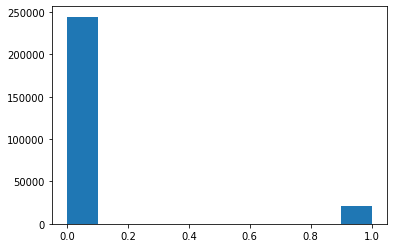

In [232]:
# plot a histogram of target variable
plt.hist(df.TARGET)
plt.show()

#### create a checklist of columns which are relevant for target column to help distinguish loan defaulters

In [233]:
# call columns in df
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_S

In [234]:
# use describe function to check outliers in numeriacl columns
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,EMPLOYED
count,265129.000000,265129.00000,265129.000000,265129.000000,2.651290e+05,265129.000000,2.651290e+05,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.0,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.0,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.00000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000,265129.000000
mean,278131.934918,0.07734,0.422662,1.711412,6.068835e+05,27192.395100,5.453207e+05,0.020818,-16116.215125,63533.847444,4987.802594,3048.755843,1.0,0.820514,0.198251,0.998012,0.285748,0.057810,2.163890,2.053932,2.033165,12.083099,0.014344,0.049553,0.040064,0.075054,0.225916,0.177366,1.432020,0.143311,1.415036,0.099604,-986.609126,0.0,0.714313,0.000091,0.015132,0.088308,0.000177,0.082134,0.003738,0.000026,0.003410,0.000008,0.003874,0.003251,0.001331,0.010704,0.000283,0.008592,0.00063,0.000585,0.000321,0.006389,0.007019,0.034402,0.267417,0.265644,1.900999,44.154014,185.078140
std,102821.170501,0.26713,0.725823,2.485751,4.049332e+05,14380.643297,3.713920e+05,0.013728,4309.005712,141111.468810,3523.266762,1490.407794,0.0,0.383760,0.398683,0.044540,0.451771,0.233383,0.911015,0.505080,0.499054,3.253455,0.118904,0.217020,0.196109,0.263479,0.418185,0.381979,2.419153,0.446231,2.397944,0.361240,833.087044,0.0,0.451742,0.009514,0.122079,0.283743,0.013313,0.274569,0.061023,0.005138,0.058293,0.002747,0.062118,0.056927,0.036464,0.102906,0.016817,0.092294,0.02509,0.024172,0.017902,0.083785,0.110920,0.204790,0.915569,0.794547,1.868989,11.805495,381.457204
min,100002.000000,0.00000,0.000000,0.261000,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25201.000000,-17912.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4185.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.517808,0.000000
25%,188995.000000,0.00000,0.000000,1.125000,2.725785e+05,16654.500000,2.385000e+05,0.010006,-19714.000000,-2845.000000,2004.000000,1814.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

#### Columns CNT_CHILDREN, AMT_CREDIT, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY,AMT_GOODS_PRICE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, CNT_FAM_MEMBERS, OBS_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, AMT_REQ_CREDIT_BUREAU_QRT,AGE,EMPLOYED having outliers as the max and 75% values and standard deviation and mean values have high difference.



In [235]:
# create a list of columns having outliers
outliers = ['CNT_CHILDREN', 'AMT_CREDIT', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY','AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS', 'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_QRT','EMPLOYED','AGE']

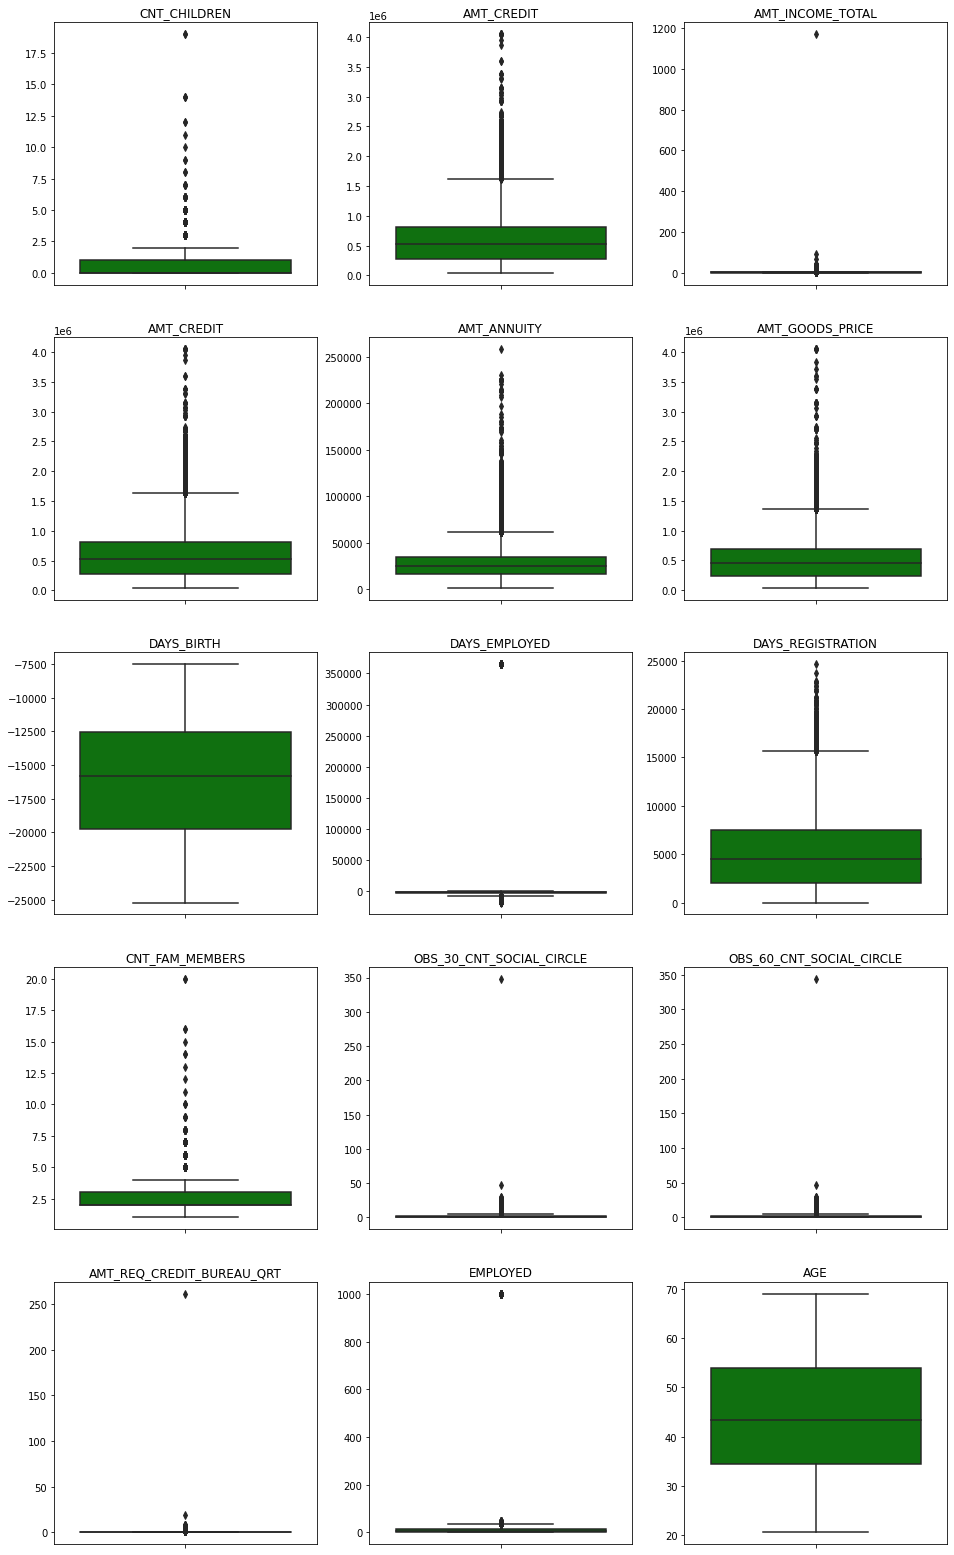

In [236]:
# Plot a boxplot to visually detect outliers
import itertools
plt.figure(figsize=[16,28])
for i,j in itertools.zip_longest(outliers, range(len(outliers))):
  plt.subplot(5,3,j+1)
  sns.boxplot(y=df[i], color='green')

  plt.xlabel('')
  plt.ylabel('')
  plt.title(i)

### Vth inference:
using boxplot we have spotted outliers in Application dataframe where days employed, income total, childrens, quarterly enquiry to bureau have some extream values and make they are factualy incorrect as well.

### Data Imbalance Check

In [237]:
# check the percentage of target column
df['TARGET'].value_counts(normalize=True)*100

0    92.266029
1     7.733971
Name: TARGET, dtype: float64

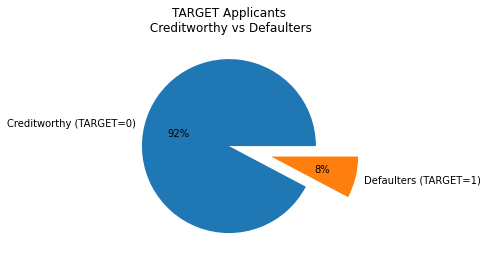

In [238]:
# plot a pie chart
plt.pie(df['TARGET'].value_counts(normalize=True)*100,labels=['Creditworthy (TARGET=0)','Defaulters (TARGET=1)'],explode=(0,0.5),autopct='%1.f%%')
plt.title('TARGET Applicants\n Creditworthy vs Defaulters')
plt.show()

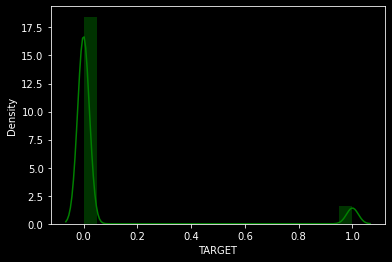

In [239]:
# plot more than one type of plot to analyse the different aspects due to data imbalance
plt.style.use('dark_background')
sns.distplot(df.TARGET, bins=20,color='g')
plt.show()

In [240]:
Flag = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','FLAG_MOBIL', 'FLAG_EMAIL']
Flag

['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMAIL']

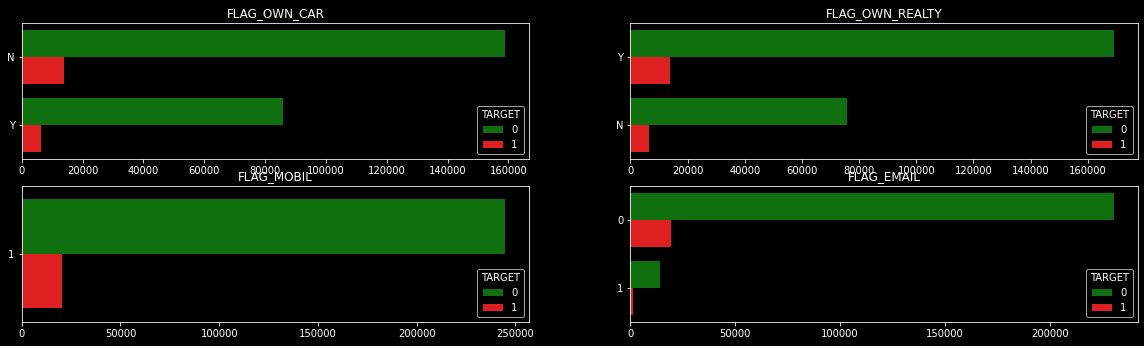

In [241]:
# plot features which impact the creditworthiness of potential borrowers
plt.figure(figsize=[20, 5.5])
for i,j in itertools.zip_longest(Flag, range(len(Flag))):
  plt.subplot(2,2,j+1)
  ax = sns.countplot(y=df[i], hue =df['TARGET'],palette=['g','r'])

  plt.xlabel('')
  plt.ylabel('')
  plt.title(i)

### VIth Inference:
It is palpable to identify that the target variable has an uneven distribution of observations as majority(98%) of the applicants did not have difficulty in repaying loans while the minority of applicants who  had difficulty in repaying loans are only 2%, hence the data is imbalanced across severl parameters.  

### Univariate Analysis

In [242]:
#  percent of OCCUPATION_TYPE of applicants
df.OCCUPATION_TYPE.value_counts(normalize=True)

Laborers                 0.491014
Sales staff              0.101230
Core staff               0.091653
Managers                 0.071939
Drivers                  0.060141
High skill tech staff    0.037661
Accountants              0.032905
Medicine staff           0.028997
Security staff           0.021480
Cooking staff            0.019176
Cleaning staff           0.014902
Private service staff    0.008385
Low-skill Laborers       0.006091
Secretaries              0.004288
Waiters/barmen staff     0.004172
Realty agents            0.002365
HR staff                 0.001893
IT staff                 0.001709
Name: OCCUPATION_TYPE, dtype: float64

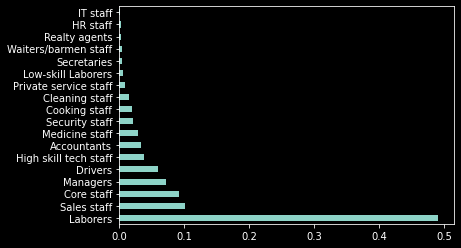

In [243]:
# plot a bar chart for occupation column
df.OCCUPATION_TYPE.value_counts(normalize=True).plot.barh()
plt.show()

##### Observation:
Majority of loan applications are concentrated around labour occupation and are decreasing with the increase in high paying occupations

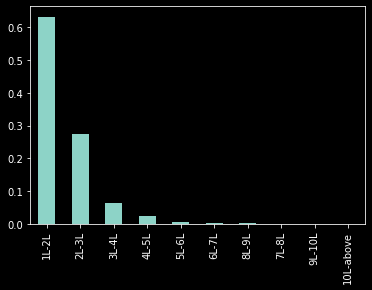

In [244]:
# plot a bar chart for Income_level column
df.Income_level.value_counts(normalize=True).plot.bar()
plt.show()

##### Observation:
Maximum of loan applicants income level falls under low category and minority of applicants are in medium level income category. And applications for loan decreasing with increase in income level.

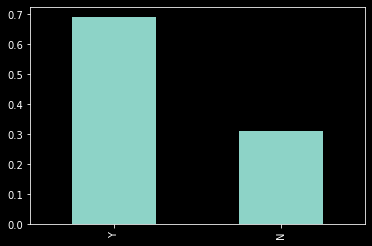

In [245]:
# plot a bar chart for FLAG_OWN_REALTY column
df.FLAG_OWN_REALTY.value_counts(normalize=True).plot.bar()
plt.show()

##### Observation:
Maximum applicants own an asset that can be taken as a security for loan.

### Segmented Analysis with respect to Target variable
#### Univariate Analysis

In [246]:
# split data into two halves
df_T0 = df[df['TARGET']==0]
df_T1 = df[df['TARGET']==1]

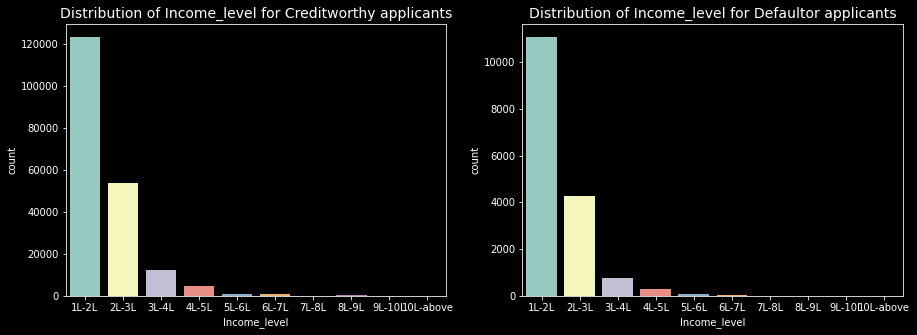

In [247]:
# plot a subplot for incomelevel with respect to target variable
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x = df_T0['Income_level'], data=df_T0)
plt.title('Distribution of Income_level for Creditworthy applicants', fontsize=14)

plt.subplot(1, 2, 2)
sns.countplot(x = df_T1['Income_level'], data=df_T1)
plt.title('Distribution of Income_level for Defaultor applicants', fontsize=14)
plt.show()

#### Observation:
Applicants with ease in loan repayment are in same income level as the applicants with difficulty in loan  repayment.

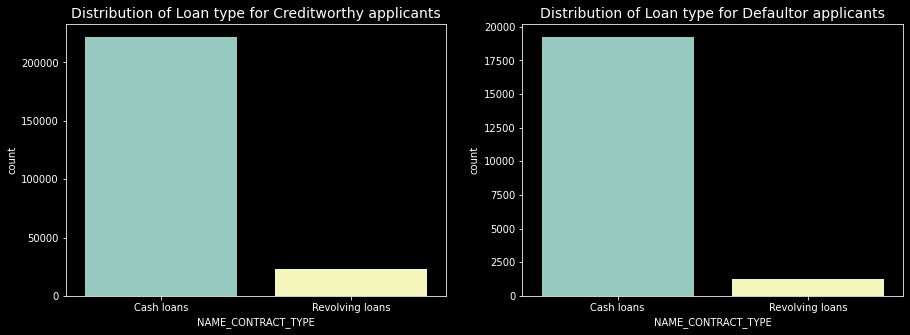

In [248]:
# plot a subplot for NAME_CONTRACT_TYPE with respect to target variable
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x = df_T0['NAME_CONTRACT_TYPE'], data=df_T0)
plt.title('Distribution of Loan type for Creditworthy applicants', fontsize=14)

plt.subplot(1, 2, 2)
sns.countplot(x = df_T1['NAME_CONTRACT_TYPE'], data=df_T1)
plt.title('Distribution of Loan type for Defaultor applicants', fontsize=14)
plt.show()

#### Observation:
Creditworthy Applicants applly for revolving loans more than defaulter applicants. But both applicants apply for cash loan in huge amount.

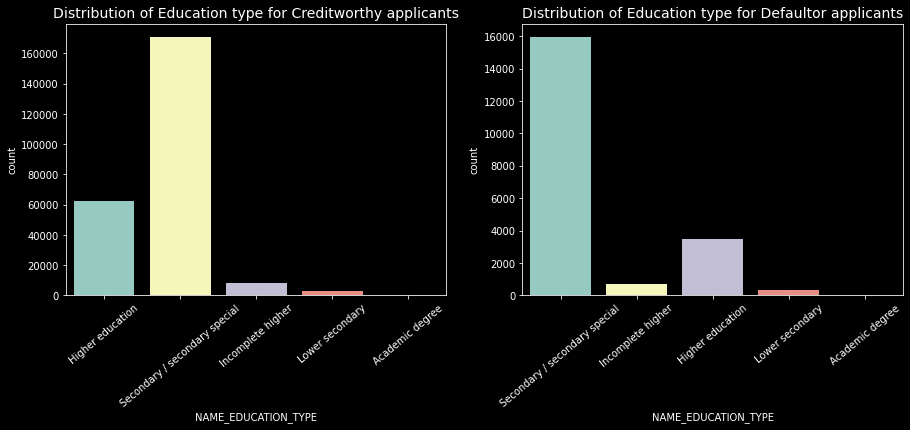

In [249]:
# plot a subplot for NAME_EDUCATION_TYPE with respect to target variable
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x = df_T0['NAME_EDUCATION_TYPE'], data=df_T0)
plt.title('Distribution of Education type for Creditworthy applicants', fontsize=14)
plt.xticks(rotation=40)
plt.subplot(1, 2, 2)
sns.countplot(x = df_T1['NAME_EDUCATION_TYPE'], data=df_T1)
plt.title('Distribution of Education type for Defaultor applicants', fontsize=14)
plt.xticks(rotation=40)
plt.show()

#### Observation:
The ratio of higher education in ceditworthy applicants is quite high and very low in defaultors. While the ratio of secodary education is same in both applicants. 

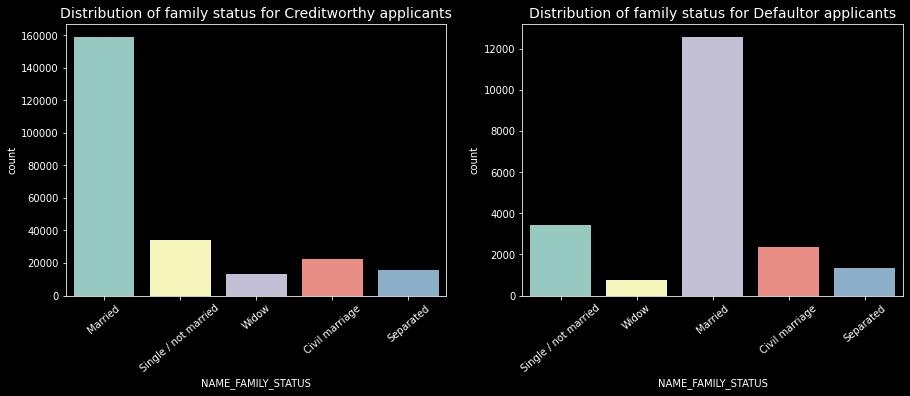

In [250]:
# plot a subplot for NAME_FAMILY_STATUS with respect to target variable
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x = df_T0['NAME_FAMILY_STATUS'], data=df_T0)
plt.title('Distribution of family status for Creditworthy applicants', fontsize=14)
plt.xticks(rotation=40)
plt.subplot(1, 2, 2)
sns.countplot(x = df_T1['NAME_FAMILY_STATUS'], data=df_T1)
plt.title('Distribution of family status for Defaultor applicants', fontsize=14)
plt.xticks(rotation=40)
plt.show()

#### Observation:
The proportion of married applicants is high in both cases while single status is comparitively higher in defaultors. 

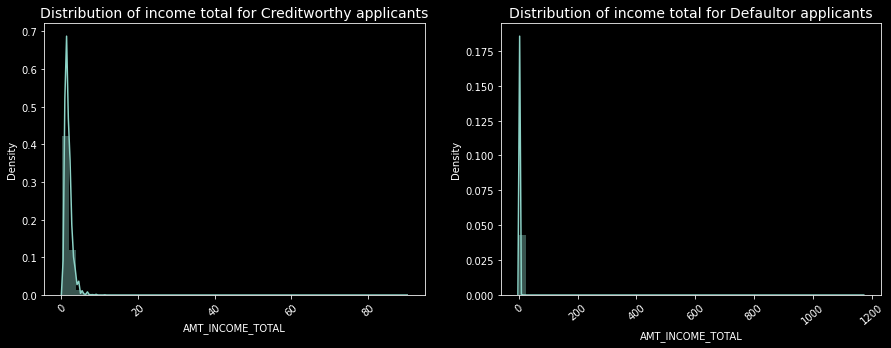

In [251]:
# plot a subplot for AMT_INCOME_TOTAL with respect to target variable
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.distplot(x = df_T0['AMT_INCOME_TOTAL'])
plt.title('Distribution of income total for Creditworthy applicants', fontsize=14)
plt.xlabel('AMT_INCOME_TOTAL')
plt.xticks(rotation=40)
plt.subplot(1, 2, 2)
sns.distplot(x = df_T1['AMT_INCOME_TOTAL'])
plt.title('Distribution of income total for Defaultor applicants', fontsize=14)
plt.xlabel('AMT_INCOME_TOTAL')
plt.xticks(rotation=40)
plt.show()

#### Observation:
Bank must reject applicants with nearly zero income total as they do not have enough capital to repay the loan, hence likely to default.

#### Bivariate/Multivariate Analysis

In [252]:
# create a pivot table
jmr =pd.pivot_table(data=df, index='NAME_INCOME_TYPE', columns='NAME_EDUCATION_TYPE', values= 'TARGET')

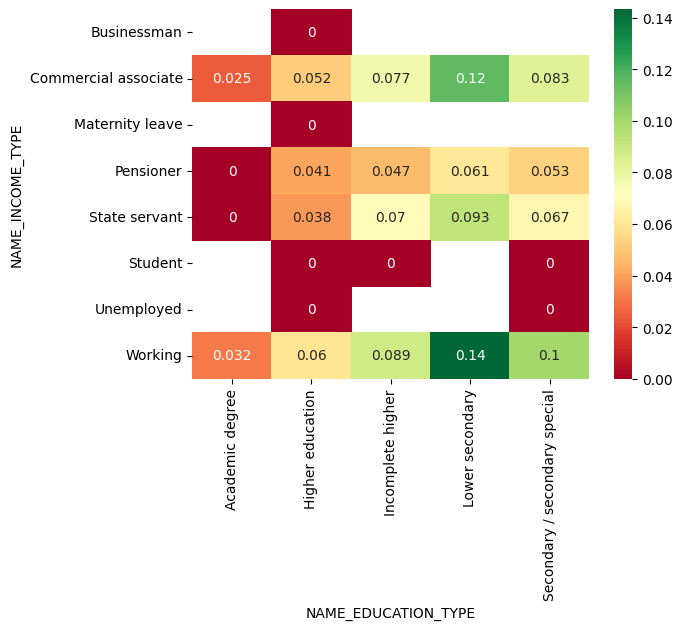

In [253]:
#create the heat map of NAME_INCOME_TYPE vs NAME_EDUCATION_TYPE vs TARGET.
plt.style.use('default')
sns.heatmap(jmr, annot=True, cmap='RdYlGn')

#### Observation:
Businessman, Maternity leave, student, unemployed with higher education where as prisoners, state servants with academic degree are creditworthy applicants and student and unemployed applicants with secondary education are also creditworthy as they didnot face difficulty while paying previous installments.


### top 10 correlation

In [254]:
# Find the top 10 correlation for the Client with all other cases 
corr= df_T0.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Col1','Col2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Col1,Col2,Correlation,Abs_Correlation
3607,AGE,DAYS_BIRTH,-1.000000,1.000000
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999775,0.999775
3673,EMPLOYED,FLAG_EMP_PHONE,-0.999773,0.999773
3669,EMPLOYED,DAYS_EMPLOYED,0.999529,0.999529
1858,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998528,0.998528
370,AMT_GOODS_PRICE,AMT_CREDIT,0.986928,0.986928
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.950020,0.950020
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,0.880225,0.880225
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.866248,0.866248
1920,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.858447,0.858447


In [255]:
# Find the top 10 correlation for the Client with payment difficulties
corr= df_T1.corr()
corr_df = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool)).unstack().reset_index()
corr_df.columns=['Col1','Col2','Correlation']
corr_df.dropna(subset=['Correlation'],inplace=True)
corr_df['Abs_Correlation']=corr_df['Correlation'].abs()
corr_df = corr_df.sort_values(by=['Abs_Correlation'], ascending=False)
corr_df.head(10)

,Col1,Col2,Correlation,Abs_Correlation
3607,AGE,DAYS_BIRTH,-1.000000,1.000000
3673,EMPLOYED,FLAG_EMP_PHONE,-0.999660,0.999660
802,FLAG_EMP_PHONE,DAYS_EMPLOYED,-0.999656,0.999656
3669,EMPLOYED,DAYS_EMPLOYED,0.999557,0.999557
1858,OBS_60_CNT_SOCIAL_CIRCLE,OBS_30_CNT_SOCIAL_CIRCLE,0.998300,0.998300
370,AMT_GOODS_PRICE,AMT_CREDIT,0.982620,0.982620
1239,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,0.957242,0.957242
1100,CNT_FAM_MEMBERS,CNT_CHILDREN,0.888164,0.888164
1920,DEF_60_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,0.866172,0.866172
1487,LIVE_REGION_NOT_WORK_REGION,REG_REGION_NOT_WORK_REGION,0.852784,0.852784


##### Observation:
Both applicants having correlation among their employment status its duration and contact details.

### Reading previous data

In [256]:
# import selected copy path and read csv file
path = "/content/drive/MyDrive/colab data/previous_application.csv"
pre_df = pd.read_csv(path)

In [257]:
pre_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [258]:
# check the shape of new dataset
pre_df.shape

(1670214, 37)

In [259]:
# check the nuklk values
pre_df.isnull().mean()

SK_ID_PREV                     0.000000e+00
SK_ID_CURR                     0.000000e+00
NAME_CONTRACT_TYPE             0.000000e+00
AMT_ANNUITY                    2.228667e-01
AMT_APPLICATION                0.000000e+00
AMT_CREDIT                     5.987257e-07
AMT_DOWN_PAYMENT               5.363648e-01
AMT_GOODS_PRICE                2.308177e-01
WEEKDAY_APPR_PROCESS_START     0.000000e+00
HOUR_APPR_PROCESS_START        0.000000e+00
FLAG_LAST_APPL_PER_CONTRACT    0.000000e+00
NFLAG_LAST_APPL_IN_DAY         0.000000e+00
RATE_DOWN_PAYMENT              5.363648e-01
RATE_INTEREST_PRIMARY          9.964370e-01
RATE_INTEREST_PRIVILEGED       9.964370e-01
NAME_CASH_LOAN_PURPOSE         0.000000e+00
NAME_CONTRACT_STATUS           0.000000e+00
DAYS_DECISION                  0.000000e+00
NAME_PAYMENT_TYPE              0.000000e+00
CODE_REJECT_REASON             0.000000e+00
NAME_TYPE_SUITE                4.911975e-01
NAME_CLIENT_TYPE               0.000000e+00
NAME_GOODS_CATEGORY            0

In [262]:
# merge data
new_df = pd.merge(df, pre_df, how='left', on ='SK_ID_CURR')
new_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,AGE_group,EMPLOYED,Employed_years,Income_level,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,2.025,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,...,21-30,1.745205,0-5,2L-3L,1038818.0,Consumer loans,9251.775,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,2.700,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,...,40-50,3.254795,0-5,2L-3L,1810518.0,Cash loans,98356.995,900000.0,1035882.0,NaN,900000.0,FRIDAY,12.0,Y,1.0,NaN,NaN,NaN,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,2.700,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,...,40-50,3.254795,0-5,2L-3L,2636178.0,Consumer loans,64567.665,337500.0,348637.5,0.0,337500.0,SUNDAY,17.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,2.700,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,...,40-50,3.254795,0-5,2L-3L,2396755.0,Consumer loans,6737.310,68809.5,68053.5,6885.0,68809.5,SATURDAY,15.0,Y,1.0,0.100061,NaN,NaN,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,0.675,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,...,50-60,0.616438,0-5,NaN,1564014.0,Consumer loans,5357.250,24282.0,20106.0,4860.0,24282.0,FRIDAY,5.0,Y,1.0,0.212008,NaN,Na

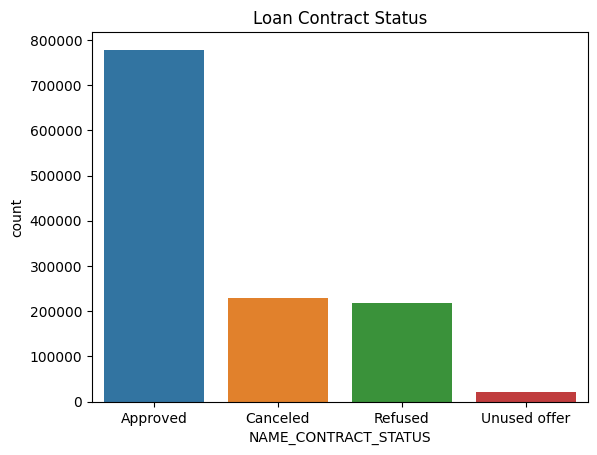

In [266]:
# plot a bar plot on contract status
sns.countplot(new_df['NAME_CONTRACT_STATUS'])
plt.title('Loan Contract Status')
plt.show()

#### Observation:
Highest Approved status of loan application advocates for the data imbalance although lower number of loan defaultors is a fact.  